## Run the provided example from meteostat

- changed the location to Salzburg instead of Vancouver
- changed the date range to 2010 instead of 2018

...to familiarize myself with the code and variables first

In [73]:
# Import Meteostat library and dependencies
from datetime import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly, Stations
import meteostat as mts
import geopandas
import pandas as pd
from windrose import WindroseAxes
import numpy as np

### Accessing metadata from meteostat

To check the metadata of the meteostat library.
More infos: https://dev.meteostat.net/python/stations.html#data-structure

In [26]:
help(mts)

Help on package meteostat:

NAME
    meteostat

DESCRIPTION
    █▀▄▀█ █▀▀ ▀█▀ █▀▀ █▀█ █▀ ▀█▀ ▄▀█ ▀█▀
    █░▀░█ ██▄ ░█░ ██▄ █▄█ ▄█ ░█░ █▀█ ░█░
    
    A Python library for accessing open weather and climate data
    
    Meteorological data provided by Meteostat (https://dev.meteostat.net)
    under the terms of the Creative Commons Attribution-NonCommercial
    4.0 International Public License.
    
    The code is licensed under the MIT license.

PACKAGE CONTENTS
    core (package)
    enumerations (package)
    interface (package)
    series (package)
    units
    utilities (package)

DATA
    __appname__ = 'meteostat'

VERSION
    1.6.8

FILE
    c:\users\isabe\anaconda3\envs\climate_data1\lib\site-packages\meteostat\__init__.py




### Test diagram from meteostat

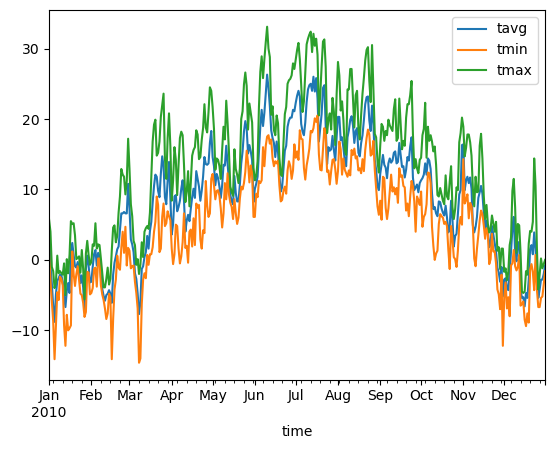

In [28]:
# Set time period
start = datetime(2010, 1, 1)
end = datetime(2010, 12, 31)

# Create Point for Salzburg
location = Point(47.7833, 13.05)

# Get daily data for 2018
data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()


### Fetching Infos about weather stations within a certain area

Look for the coordinates of the weather station.

In [30]:
# Get nearby weather stations
stations = Stations()
stations = stations.nearby(47.7972, 13.0477)
station = stations.fetch(1)

# Print DataFrame
print(station)

                      name country region    wmo  icao  latitude  longitude  \
id                                                                            
11350  Salzburg / Freisaal      AT     SZ  11350  <NA>   47.7833      13.05   

       elevation       timezone hourly_start hourly_end daily_start daily_end  \
id                                                                              
11350      420.0  Europe/Vienna          NaT        NaT         NaT       NaT   

      monthly_start monthly_end     distance  
id                                            
11350           NaT         NaT  1555.130874  


### Linear diagrams (of a weather station for a certain time frame)

Create the following diagrams:
- average temperature
- daily wind speed

#### Linear diagram: average temperature

use the coordinates from f.e. Salzburg/Freisaal to generate the diagram.
Displays average temperature.

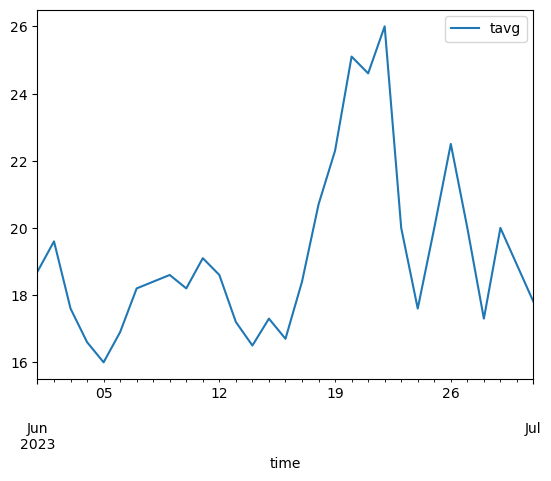

In [31]:
# Set time period
start = datetime(2023, 6, 1)
end = datetime(2023, 7, 1)

# Create Point for Salzburg
location = Point(47.7833, 13.05)

# Get daily data for 2023
data = Daily(location, start, end)
data = data.fetch()

# Line chart displaying average temperature
data.plot(y=['tavg'])
plt.show()

#### Linear diagram: daily wind speed

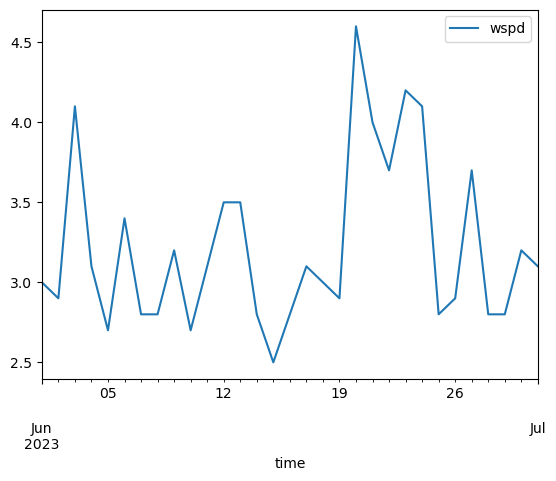

In [32]:
# Line chart displaying wind speed
data.plot(y=['wspd'])
plt.show()

### Precipitation bar charts (of a weather station for a certain time frame)

#### Precipitation bar chart - version 1

Including:
- a title of the diagram
- shortened and rotated labels of the dates (x-Axis)
- labelling the amount of Precipitation (y-Axis)
- color formatting and size adaption of the bars

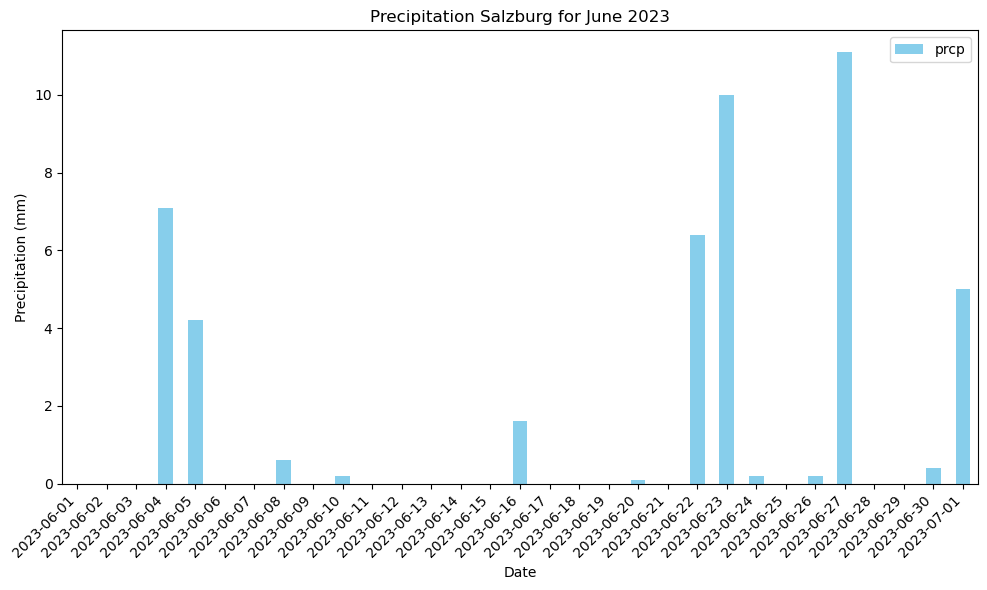

In [41]:
# Bar chart for precipitation over two months per day, incl. title
data.plot(kind='bar', y='prcp', figsize=(10, 6), color='skyblue')
plt.title('Precipitation Salzburg for June 2023')

# Labelling the axes
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: data.index[int(x)].strftime('%Y-%m-%d')))

# Adjust layout to prevent clipping of labels
plt.tight_layout() 
plt.show()

#### Precipitation bar chart - version 2

Version 2 of the Precipitation bar chart includes:
- shortened date labels (x-axis)
- changed color of bars and title
- larger diagram title 

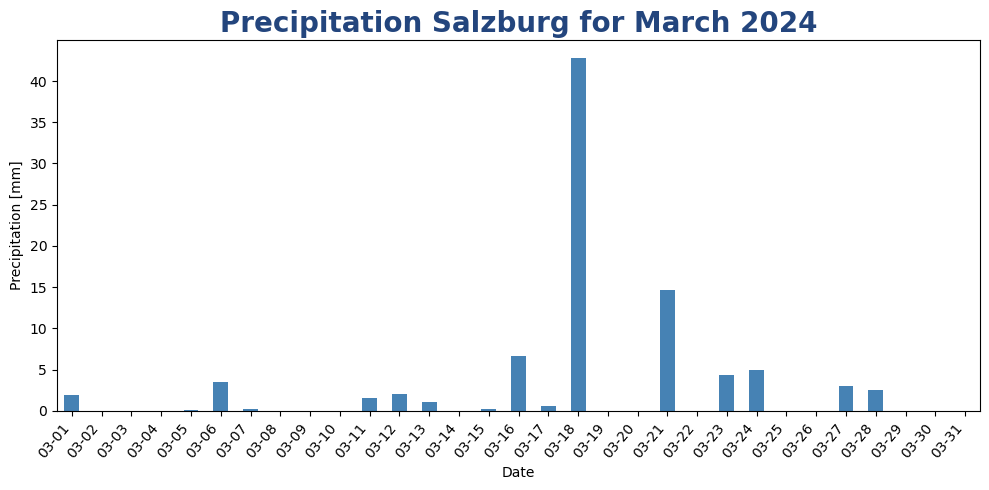

In [89]:
# Define the location and time period
#location = Point(47.81, 13.04, 424)  # Coordinates for Salzburg, Austria
#start = datetime.datetime(2024, 3, 1)
#end = datetime.datetime(2024, 3, 31)

# Fetch daily weather data
data = Daily(location, start, end)
data = data.fetch()

# Plot bar chart for precipitation, incl. title, lables
data['prcp'].plot(kind='bar', figsize=(10, 5), color='steelblue')
title_font = {'size': 20, 'color': '#23457d', 'weight': 'bold'}
plt.title('Precipitation Salzburg for March 2024', fontdict=title_font)
plt.xlabel('Date')
plt.ylabel('Precipitation [mm]')
plt.xticks(rotation=50, ha='right')

# Format x-axis labels and other formatting
formatter = FuncFormatter(lambda x, _: data.index[int(x)].strftime('%m-%d'))
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout() 

# Plot precipitation bar chart
plt.show()

### Histogram of wind speed distribution

Displays the frequency of wind speeds in form of a histogram.
Inlcuded:
- diagram title
- formatted histogram style
- number of histogram bins (default: 20)

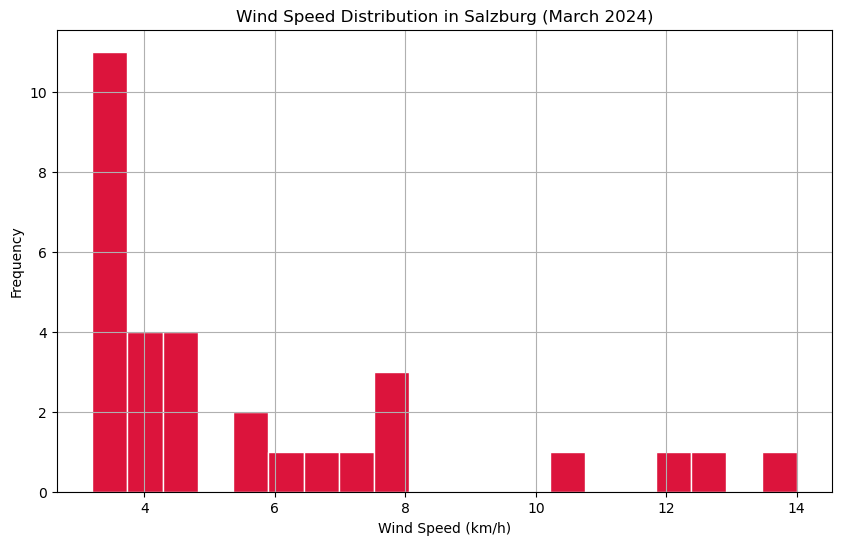

In [71]:
# If no previous location and time frame have been defined
location = Point(47.81, 13.04, 424)  
start = datetime.datetime(2024, 3, 1)
end = datetime.datetime(2024, 3, 31)

data = Daily(location, start, end)
data = data.fetch()

# wind speed data
wind_speed = data['wspd']

# create and style the histogram
plt.figure(figsize=(10, 6))
plt.hist(wind_speed.dropna(), bins=20, color='crimson', edgecolor='white')
plt.title('Wind Speed Distribution in Salzburg (March 2024)')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(True)

# plot histogram
plt.show()

### Spider Charts (wind speed and wind direction)

#### Spider chart - version 1 (via numpy libary)

Display wind speed and wind direction in form of a spider chart for a certain weather station and time frame.

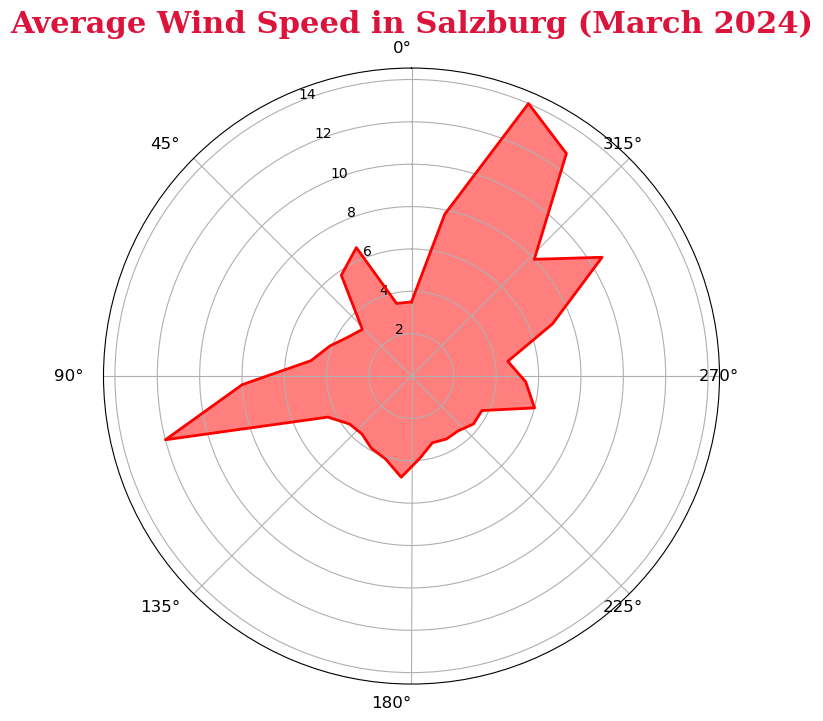

In [75]:
# part 1) and 2) only necessary if not previously defined

# 1) importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Hourly, Point
import datetime
import numpy as np

# 2) Define the location and time period
location = Point(47.81, 13.04, 424)  # Coordinates for Salzburg, Austria
start = datetime.datetime(2024, 3, 1)
end = datetime.datetime(2024, 3, 31)

# Fetch hourly weather data(if not defined previously)
data = Daily(location, start, end)
data = data.fetch()

# Average wind speed by day
data_daily = data.resample('D').mean()

# Prepare data for the spider chart
num_days = len(data_daily)
angles = np.linspace(0, 2 * np.pi, num_days, endpoint=False).tolist()
angles += angles[:1]

wind_speeds = data_daily['wspd'].tolist()
wind_speeds += wind_speeds[:1]

# Plot spider chart (using polar plot)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, wind_speeds, color='red', linewidth=2, linestyle='solid')
ax.fill(angles, wind_speeds, color='red', alpha=0.5)

# Ensure that the number of ticks and labels match
ax.set_xticks(np.linspace(0, 2 * np.pi, num=8, endpoint=False))
ax.set_xticklabels(['0°', '45°', '90°', '135°', '180°', '225°', '270°', '315°'], fontsize=12, rotation=0.9, ha='right')
ax.set_theta_zero_location("N")

ax.set_title('Average Wind Speed in Salzburg (March 2024)', color='crimson', weight='bold', fontfamily='serif', fontsize='22')

# Show the plot
plt.show()



#### Spider chart - version 2 (via windrose library)

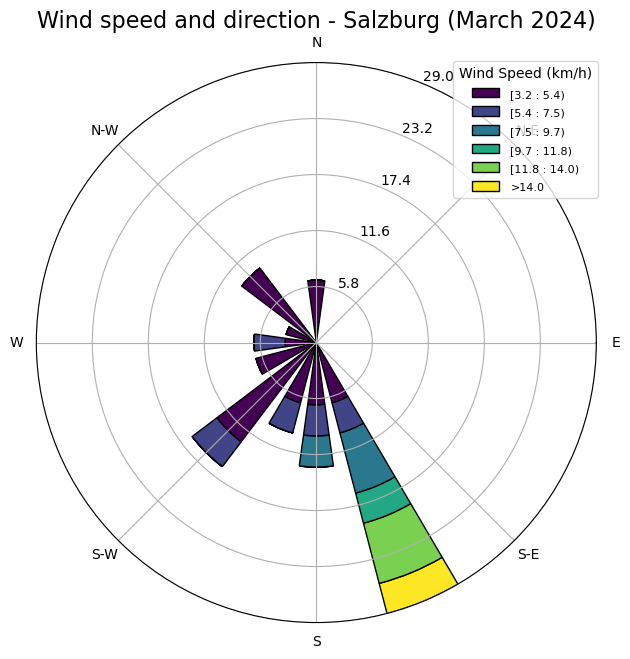

In [125]:
# Extract wind direction and wind speed data
wind_dir = data['wdir']  
wind_speed = data['wspd']

# set windrose diagram and define axes
fig = plt.figure(figsize=(7, 7))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(wind_dir.dropna(), wind_speed.dropna(), normed=True, bins=6, opening=0.7, edgecolor='black')

# style windrose diagram (spider chart)
ax.set_legend(loc='best', title='Wind Speed (km/h)')
ax.set_title('Wind speed and direction - Salzburg (March 2024)', fontsize=16, )

# plot the spider chart
plt.show()

### Pie chart of rain intensity days (for a certain weather station and time frame)

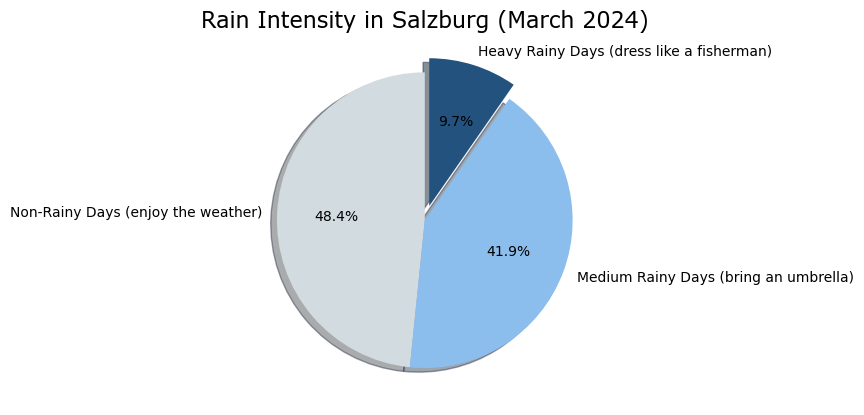

In [124]:
# Fetch daily weather data
#data = Daily(location, start, end)
#data = data.fetch()

#start = datetime(2024, 3, 1)
#end = datetime(2023, 3, 30)

# Defining rainy days
non_rainy_days = data[data['prcp'] == 0].shape[0]
medium_rainy_days = data[(data['prcp'] > 0) & (data['prcp'] <= 5)].shape[0]
heavy_rain_days = data[(data['prcp'] > 5) & (data['prcp'] <= 999)].shape[0]

labels = ['Non-Rainy Days (enjoy the weather)', 'Medium Rainy Days (bring an umbrella)', 'Heavy Rainy Days (dress like a fisherman)']
sizes = [non_rainy_days, medium_rainy_days, heavy_rain_days]

explode = (0, 0, 0.1)  

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, explode=explode,
       colors=['#d1dbe0', '#8cbeed', '#22527d'], startangle=90, autopct='%1.1f%%', shadow={'ox': -0.03, 'edgecolor': '#333a52', 'shade': 0.6})
ax.set_title('Rain Intensity in Salzburg (March 2024)', fontsize=16, fontfamily="Verdana")
plt.show()


### Addendum: checking current data

In [85]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2024-03-01,6.0,2.3,9.2,1.9,0.0,353.0,3.5,11.1,1007.7,NaN
2024-03-02,8.1,4.7,14.0,0.0,0.0,153.0,3.5,14.8,1006.1,NaN
2024-03-03,10.6,3.3,18.8,0.0,0.0,168.0,6.6,25.9,1001.2,NaN
2024-03-04,9.4,6.1,13.6,0.0,0.0,270.0,5.8,22.2,1008.0,NaN
2024-03-05,8.0,5.2,10.2,0.1,0.0,234.0,3.2,13.0,1014.6,NaN
2024-03-06,5.1,4.0,6.4,3.5,0.0,313.0,3.5,11.1,1019.1,NaN
2024-03-07,4.7,0.6,7.1,0.2,0.0,357.0,4.1,13.0,1020.8,NaN
2024-03-08,5.1,-1.0,11.8,0.0,0.0,151.0,4.8,16.7,1013.4,NaN
2024-03-09,9.8,4.6,16.0,0.0,0.0,165.0,8.0,18.5,1004.5,NaN


In [86]:
print(data.head())

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2024-03-01   6.0   2.3   9.2   1.9   0.0  353.0   3.5  11.1  1007.7   NaN
2024-03-02   8.1   4.7  14.0   0.0   0.0  153.0   3.5  14.8  1006.1   NaN
2024-03-03  10.6   3.3  18.8   0.0   0.0  168.0   6.6  25.9  1001.2   NaN
2024-03-04   9.4   6.1  13.6   0.0   0.0  270.0   5.8  22.2  1008.0   NaN
2024-03-05   8.0   5.2  10.2   0.1   0.0  234.0   3.2  13.0  1014.6   NaN


In [87]:
print(data)

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2024-03-01   6.0   2.3   9.2   1.9   0.0  353.0   3.5  11.1  1007.7   NaN
2024-03-02   8.1   4.7  14.0   0.0   0.0  153.0   3.5  14.8  1006.1   NaN
2024-03-03  10.6   3.3  18.8   0.0   0.0  168.0   6.6  25.9  1001.2   NaN
2024-03-04   9.4   6.1  13.6   0.0   0.0  270.0   5.8  22.2  1008.0   NaN
2024-03-05   8.0   5.2  10.2   0.1   0.0  234.0   3.2  13.0  1014.6   NaN
2024-03-06   5.1   4.0   6.4   3.5   0.0  313.0   3.5  11.1  1019.1   NaN
2024-03-07   4.7   0.6   7.1   0.2   0.0  357.0   4.1  13.0  1020.8   NaN
2024-03-08   5.1  -1.0  11.8   0.0   0.0  151.0   4.8  16.7  1013.4   NaN
2024-03-09   9.8   4.6  16.0   0.0   0.0  165.0   8.0  18.5  1004.5   NaN
2024-03-10  13.4  10.0  17.1   0.0   0.0  159.0  12.0  35.2   995.9   NaN
2024-03-11   9.3   6.6  12.1   1.6   0.0  315.0   4.4  16.7  1006.2   NaN
2024-03-12   7.1   5.5   8.9   2.0   0